In [1]:
from spacerocks import SpaceRock, Units

from astroquery.jplhorizons import Horizons

from astropy.time import Time
from astropy import units as u
from astropy.coordinates import SkyCoord

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
units = Units()
units.timescale = 'tdb' # JPL gives elements in TDB. This actually matters for precise ephemerides.
units.current()

Quantity             Unit           
---------------------------------------
distance             AU             
angle                deg            
timescale            tdb            
timeformat           None           
speed                AU / d         
size                 km             
density              g / cm3        
mass                 kg             
ra                   deg            
dec                  deg            


In [3]:
rock = SpaceRock(a=2.765985763166805E+00, 
                 e=7.821081922804583E-02, 
                 inc=1.058793079235974E+01, 
                 node=8.027114319577151E+01, 
                 arg=7.373012101495385E+01, 
                 M=2.108992101403974E+02, 
                 epoch=2459225.500000000, 
                 H=3.53,
                 G=0.12,
                 name='Ceres',
                 origin='sun',
                 units=units)

In [17]:
startdate = Time('2000-01-01', scale='utc', format='iso')
testdates = Time(np.arange(startdate.jd, startdate.jd + 20*365.25, 10), scale='utc', format='jd')

In [18]:
units.timescale = 'utc'
prop, planets, sim = rock.propagate(epochs=testdates.jd, model=2, units=units)

In [19]:
obs = prop.observe(obscode=-48)

In [25]:
rock_id = 'Ceres'
ephem_Horizons = Horizons(id=rock_id, location='@hst',
                          epochs={'start':testdates[0].iso, 
                                  'stop':testdates[-1].iso, 
                                  'step':'10d'}).ephemerides()

In [26]:
pos_Horizons = SkyCoord(ephem_Horizons['RA'], ephem_Horizons['DEC'], frame='icrs', unit=(u.deg, u.deg))
pos_pred = SkyCoord(obs.ra.deg, obs.dec.deg, frame='icrs', unit=(u.deg, u.deg))
sep = pos_pred.separation(pos_Horizons)

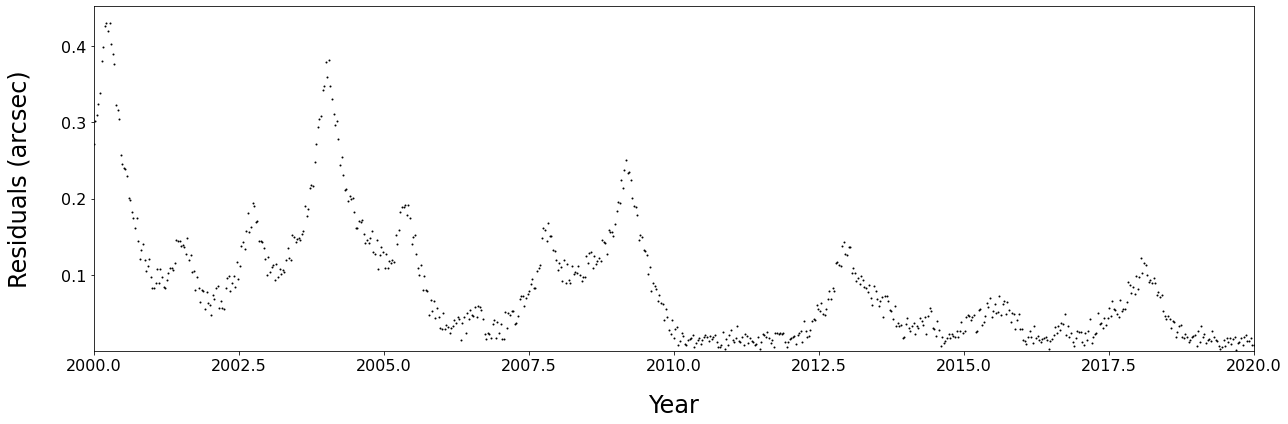

In [28]:
fig, ax = plt.subplots(figsize=(18, 6))

ax.scatter(np.linspace(2000, 2020, len(sep)), sep.arcsec, color='black', s=1)
ax.tick_params(labelsize=16)

ax.set_xlabel('Year', fontsize=24, labelpad=20)
ax.set_ylabel('Residuals (arcsec)', fontsize=24, labelpad=30);
ax.set_xlim([2000, 2020])
ax.set_ylim(bottom=1e-4)
fig.tight_layout()